In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
import os
import pathlib
import random


2023-07-20 16:17:43.161411: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
img = plt.imread('/Users/alirazi/Desktop/ultrasound breast classification/train/benign/benign (36)-rotated1-rotated2.png')

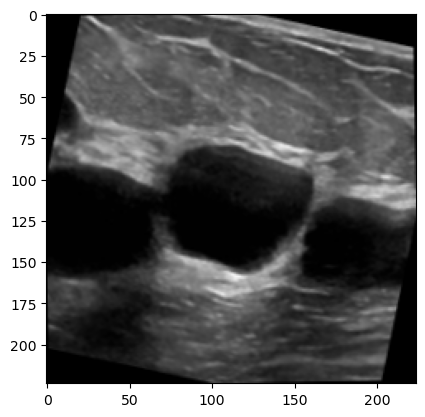

In [8]:
plt.imshow(img)
plt.show()

In [18]:
import glob
from cv2 import cv2

ModuleNotFoundError: No module named 'cv2'

In [12]:
import cv2

path_b = "/Users/alirazi/Desktop/ultrasound breast classification/train/benign"
for file in glob.glob(path_b):
    image_read =cv2.imread(benign)
    c = cv2.cvtColor(imageread, cv2.COLOR_RGR2RGB)
    cv2.imshow('Color image,c')
    k = cv2.waitKey(1000)
    cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'cv2'

In [19]:
import glob

path_b = "/Users/alirazi/Desktop/ultrasound breast classification/train/benign"
 files= glob.glob(path_b + '/*.csv')
    for f in files:
        bbc_df = pd.
    
    

IndentationError: unexpected indent (3543370122.py, line 4)

In [22]:
import glob 
import cv2
images = [cv2. imread(benign) for bening in glob.glob( "/Users/alirazi/Desktop/ultrasound breast classification/train/benign/*.png")]

ModuleNotFoundError: No module named 'cv2'

In [21]:
from os import lisdir 
from os.path import isfile, join 
import numpy 
import cv2

path_bening =  "/Users/alirazi/Desktop/ultrasound breast classification/train/benign"
onlyfiles = [f for f in listdir(pasth_bening) if isfile(join(path_bening,f))]
images = numpy.empty(len(onlyfiles,dtype=object))
for n in range (0, len(onlyfiles)):
    images[n] = cv2.imread(join(path_bening,onlyfiles[n]))

ImportError: cannot import name 'lisdir' from 'os' (/Users/alirazi/anaconda3/envs/capstone_AliRazi/lib/python3.8/os.py)

In [ ]:
original_images = os.listdir( "/Users/alirazi/Desktop/ultrasound breast classification/train/benign")
original_images = 

In [27]:
import glob 

bening_directionary = "/Users/alirazi/Desktop/ultrasound breast classification/train/benign"

png_pattern = bening_directionary + '*.png'

png_files = glob.glob(png_pattern)

for file in png_files:
    print(file)


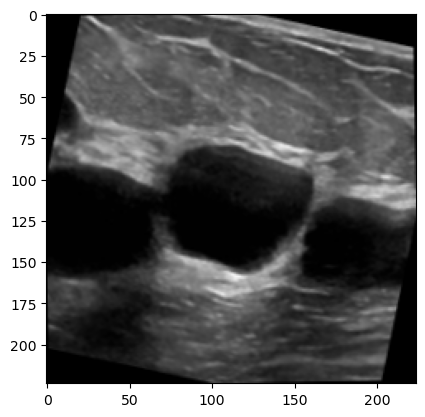

In [28]:
plt.imshow(img)
plt.show()

In [5]:
path_train = "/Users/alirazi/Desktop/ultrasound breast classification/train"
data_dir = pathlib.Path(path_train)

In [7]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['.DS_Store', 'benign', 'malignant'], dtype='<U9')

In [8]:
Path_Bening = os.path.join(data_dir,'bening')
Path_Malignant = os.path.join(data_dir,'malignant')

In [9]:
Count_Imag = len(list(data_dir.glob('*/*.png')))
Count_Imag

7352

AttributeError: 'str' object has no attribute 'glob'

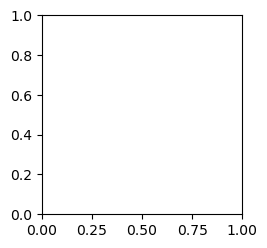

In [24]:
plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.png"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

In [25]:
from pathlib import Path
import imghdr

data_dir = '/Users/alirazi/Desktop/ultrasound breast classification/train'
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [26]:
batch_size = 32
img_height = 224
img_width = 224

In [27]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)
    

val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)
Found 1578 files belonging to 3 classes.
Using 1263 files for training.
Found 1578 files belonging to 3 classes.
Using 315 files for validation.

SyntaxError: invalid syntax (2269359003.py, line 18)